In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('all_data_no_duplicates_equal_size.csv', index_col=0)

In [4]:
df.head()

,mfcc_a_0,mfcc_a_1,mfcc_a_2,mfcc_a_3,mfcc_a_4,mfcc_a_5,mfcc_a_6,mfcc_a_7,mfcc_a_8,mfcc_a_9,...,onset_a,onset_std,bpm,rmseP_skew,rmseP_kurtosis,rmseH_skew,rmseH_kurtosis,beats_a,beats_std,genre
song_id,,,,,,,,,,,,,,,,,,,,,
17bf8d5f74d4e53a3f918263da27600ba0e555b5,-131.34530,154.44778,-46.625813,55.491830,-2.969374,28.455832,-11.929317,9.539672,4.456010,9.052435,...,1.541892,1.521225,132.512019,1.070878,1.396955,0.741772,1.111939,14.542479,8.524608,blues
80822cc306bcf4d6ce727ed9b185382183590feb,-216.48515,159.88239,-53.843456,41.647510,4.802261,6.194261,-0.619864,1.253317,5.258920,9.118914,...,1.589639,1.765213,117.453835,1.569087,2.719492,0.010281,-0.229946,14.460827,8.436646,blues
fe86aae90064f43dd3c9ccc2271fd3570ea8d530,-97.64007,137.78816,-43.407673,57.867115,-17.740084,48.168274,-20.405445,14.013074,-11.915717,13.601735,...,1.332900,0.778537,123.046875,1.270062,1.725401,0.076682,-0.120848,14.568310,8.531551,blues
8a36fef7cc58e415b09f472062d529ad75f6888a,-218.33733,139.85650,-46.182710,29.928583,-5.652246,26.629574,-6.704617,15.074043,0.800906,0.926584,...,1.527841,1.310864,132.512019,1.251199,1.432018,1.522334,2.031958,14.527072,8.542730,blues
6a90012a2f47eb44abcaf1641683f86425713e40,-137.82199,145.93646,-52.225964,44.550194,-5.257767,24.834461,-7.554444,12.882658,4.022466,11.714938,...,1.525155,1.458287,89.102909,2.108472,5.425519,0.541542,1.362728,14.487932,8.556227,blues


## Train Test Split

Split data first to avoid data leakage.

In [5]:
X = df.drop(['genre'], axis=1)
y = df['genre']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=0)

## Add Encoded Label

In [7]:
le = LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [8]:
integer_mapping = {l: i for i, l in enumerate(le.classes_)}
integer_mapping

{'blues': 0,
 'classical': 1,
 'disco': 2,
 'electronic': 3,
 'hiphop': 4,
 'jazz': 5,
 'pop': 6,
 'rock': 7}

In [9]:
y_train = le.transform(y_train)

## Normalize Data

In [10]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [11]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[0.72421513, 0.59108237, 0.19782452, ..., 0.05358386, 0.71193438,
        0.83544622],
       [0.79813827, 0.49151313, 0.42019212, ..., 0.01889095, 0.7775551 ,
        0.89224038],
       [0.88867823, 0.4752002 , 0.22055826, ..., 0.03955386, 0.77787513,
        0.83587753],
       ...,
       [0.89029076, 0.44432169, 0.18342791, ..., 0.03750217, 0.7433581 ,
        0.89459902],
       [0.75147139, 0.64526921, 0.36018344, ..., 0.02056444, 0.79299933,
        0.83877967],
       [0.54623376, 0.65068471, 0.23994259, ..., 0.21766329, 0.79570906,
        0.81993317]])

In [12]:
X_train_scaled.shape

(589, 79)

## PCA - Dimension Reduction

In [13]:
pca = PCA(n_components=20) 
pca.fit(X_train_scaled)

PCA(n_components=20)

In [14]:
X_train_PC = pca.transform(X_train_scaled)

In [15]:
principalDf = pd.DataFrame(data = X_train_PC, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12', 'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18', 'pc19', 'pc20'])

<BarContainer object of 20 artists>

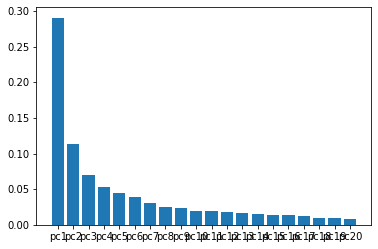

In [16]:
plt.bar(principalDf.columns, pca.explained_variance_ratio_)

In [17]:
sum(pca.explained_variance_ratio_[0:20])

0.8489399718054322

First 20 PCs account for 85% of variance.

In [18]:
principalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20
0,-0.017265,0.073234,0.235378,0.337747,0.135218,-0.086882,-0.060840,-0.357947,-0.122165,-0.032167,0.256323,-0.160945,0.236770,0.062168,0.027008,0.091937,0.198494,0.082511,-0.099987,-0.036501
1,-0.853209,0.503111,-1.062490,-0.110682,-0.017323,0.085556,0.062203,0.226820,-0.757619,0.059778,0.349063,0.313811,0.249408,-0.061995,0.461120,0.027295,-0.004298,0.122174,0.095083,-0.053202
2,-1.071746,0.398660,0.152159,0.352237,0.249050,0.002128,-0.384163,-0.111942,-0.299720,-0.075336,0.484703,0.072586,-0.273931,-0.246006,-0.001800,0.183615,0.204479,-0.118018,-0.170886,0.175325
3,0.786546,0.958698,0.661862,0.389581,-0.022711,0.311274,-0.098250,-0.233877,0.320022,0.524698,0.822237,-0.294817,-0.323149,0.458129,-0.255308,-0.281866,-0.337613,0.535445,0.095215,0.247379
4,1.448522,0.144797,0.347733,0.345240,-0.648344,0.134018,-0.141322,0.000801,-0.037219,0.003257,0.153738,0.172846,-0.060770,-0.040095,-0.143955,0.001852,-0.317747,0.041268,0.245371,0.005068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,1.060972,0.573800,-0.186293,0.144333,-0.444950,-0.027416,0.116618,-0.019849,0.116849,0.099256,0.034400,-0.127974,-0.121165,0.343030,-0.055119,0.103183,0.253331,0.033476,-0.183675,0.125118
585,0.012840,0.758579,-0.205939,0.349576,-0.061084,-0.052708,0.243478,-0.235701,-0.454309,0.163183,0.515622,0.180354,0.137966,0.118047,0.199746,0.200598,0.076662,0.133889,0.071946,0.228734
586,-0.165722,-0.559592,0.209028,-0.056490,-0.160157,0.625413,0.352789,0.063396,0.005084,0.002976,0.138778,0.004120,0.097807,-0.031154,0.012042,-0.012967,0.121551,0.085314,-0.006083,0.026646
587,-0.696943,-0.300263,-0.671960,0.755936,0.444196,-0.324679,-0.115481,0.139897,-0.163773,0.351455,-0.380906,0.086952,-0.055378,0.258947,-0.129180,0.014898,-0.122321,-0.126504,0.143359,-0.112745


## KNN

In [19]:
# defining parameter range
k_range = list(range(1, 31))
leaf_size = list(range(1, 51))
p=[1,2]
param_grid = dict(n_neighbors=k_range, leaf_size=leaf_size, p=p)
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy', refit=True, return_train_score=False,verbose=1)
grid_knn.fit(X_train_PC, y_train)

Fitting 10 folds for each of 3000 candidates, totalling 30000 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'p': [1, 2]},
             scoring='accuracy', verbose=1)

In [23]:
print(grid_knn.best_params_)
print(grid_knn.best_estimator_)
print(grid_knn.best_score_) # accuracy for train

{'leaf_size': 1, 'n_neighbors': 17, 'p': 2}
KNeighborsClassifier(leaf_size=1, n_neighbors=17)
0.5993278784336645


In [24]:
y_test = le.transform(y_test)
X_test_scaled = scaler.transform(X_test)
X_test_PC = pca.transform(X_test_scaled)

In [25]:
test_preds_knn = grid_knn.predict(X_test_PC)
print(classification_report(le.inverse_transform(y_test), le.inverse_transform(test_preds_knn)))

              precision    recall  f1-score   support

       blues       0.48      0.54      0.51        37
   classical       0.95      0.97      0.96        36
       disco       0.43      0.83      0.57        36
  electronic       0.74      0.39      0.51        36
      hiphop       0.70      0.38      0.49        37
        jazz       0.89      0.68      0.77        37
         pop       0.29      0.28      0.28        36
        rock       0.63      0.72      0.68        36

    accuracy                           0.60       291
   macro avg       0.64      0.60      0.60       291
weighted avg       0.64      0.60      0.60       291



In [26]:
class_names = le.classes_
cnf_matrix = confusion_matrix(y_test, test_preds_knn)

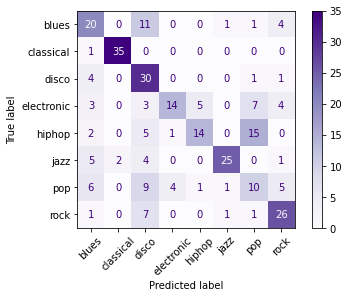

In [27]:
plot_confusion_matrix(grid_knn, X_test_PC, y_test, xticks_rotation=45,
                                 display_labels=class_names,
                                 cmap=plt.cm.Purples)

In [28]:
accuracy_score(y_test, test_preds_knn) # for KNN

0.5979381443298969

## SVM

In [29]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svm = GridSearchCV(SVC(), param_grid, scoring='accuracy', cv=10, refit = True, verbose = 1)
grid_svm.fit(X_train_PC, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             scoring='accuracy', verbose=1)

In [30]:
print(grid_svm.best_params_)
print(grid_svm.best_estimator_)
print(grid_svm.best_score_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)
0.6689947399181765


In [31]:
test_preds_svm = grid_svm.predict(X_test_PC)
print(classification_report(le.inverse_transform(y_test), le.inverse_transform(test_preds_svm)))

              precision    recall  f1-score   support

       blues       0.50      0.54      0.52        37
   classical       0.97      1.00      0.99        36
       disco       0.64      0.83      0.72        36
  electronic       0.53      0.50      0.51        36
      hiphop       0.73      0.59      0.66        37
        jazz       0.93      0.76      0.84        37
         pop       0.47      0.42      0.44        36
        rock       0.71      0.81      0.75        36

    accuracy                           0.68       291
   macro avg       0.69      0.68      0.68       291
weighted avg       0.69      0.68      0.68       291



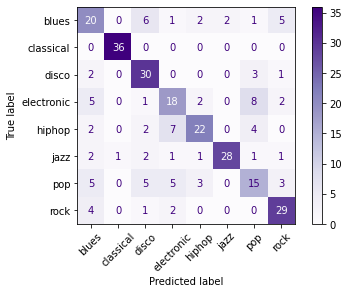

In [32]:
class_names = le.classes_
cnf_matrix = confusion_matrix(y_test, test_preds_svm)
plot_confusion_matrix(grid_svm, X_test_PC, y_test, xticks_rotation=45,
                                 display_labels=class_names,
                                 cmap=plt.cm.Purples)

In [33]:
accuracy_score(y_test, test_preds_svm) # for SVM

0.6804123711340206